In [2]:
import pandas as pd
import numpy as np
data=pd.read_csv('/home/kanishk-jain/Desktop/Github uploads/Spam Classifier/SpamClassifier_github/Data/SMSSpamCollection_augmented', sep='\t', header=None, names=['label', 'message'])
data.head()#first five entries
data.tail()#last five entries
data.info()#information of the data
data.shape#rows and columns
data['label'].value_counts()#go to label column and then count the number of repetitions of each entry entry spam is 747 times in the label column
data[data['label']=="spam"]['message'].head()#in the dataset find the dataset of label==spam and print their messages, head() tells the first 5 messages of that label are to be count only
data[data['label']=='ham']['message'].head()#here and above it is a condition data[condition][printing the desired part of the condtion true].head()
#so just data['label']=='ham' will just give that in the data is the entry true or false


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20573 entries, 0 to 20572
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    20573 non-null  object
 1   message  20573 non-null  object
dtypes: object(2)
memory usage: 321.6+ KB


0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

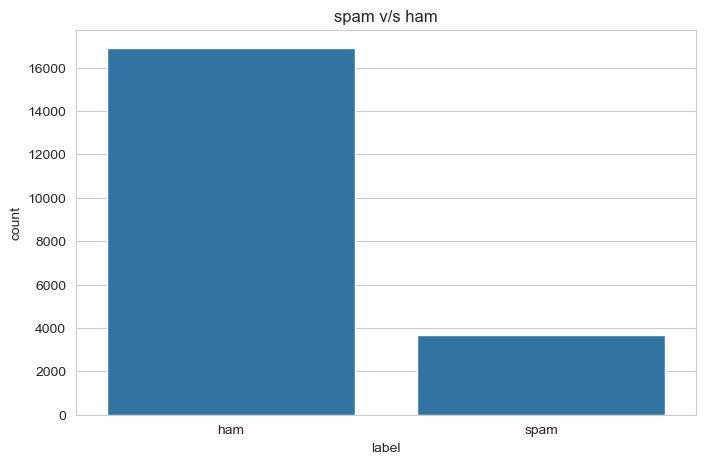

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.countplot(x='label', data=data)#telling that the x axis should be having the entries from the label column
plt.title('spam v/s ham')
plt.xlabel('label')
plt.ylabel('count')
plt.show

In [4]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')#words like, the, is, if, a etc...
nltk.download('punkt')#for puctuation marks

def clean(text):
    text=text.lower()#to make all the alphabets in the lowercase
    text=''. join([char for char in text if char not in string.punctuation])#remove the punctuation marks by tokenizing each "alphabet or character"
    tokens=word_tokenize(text)#tokenizing "words"
    tokens=[word for word in tokens if word not in stopwords.words('english')]#checking each word that if it is a stopword according to english dictionary or not
    return ' '.join(tokens)#if not the stop word then can join them again
data['cleaned']=data['message'].apply(clean)#creating a new column and applying the "clean" function on them, and appending them back to the data
data[['label', 'message', 'cleaned']].head()#showing the table with the newly added column

[nltk_data] Downloading package stopwords to /home/kanishk-
[nltk_data]     jain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/kanishk-
[nltk_data]     jain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,label,message,cleaned
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(max_features=4000)#taking all the words and then, choosing the most common 4000 words out of all of them
X = vectorizer.fit_transform(data['cleaned'])#and the column which will be used for the above condition is the newly added column "cleaned"
print("Feature matrix shape:", X.shape)#and now we will print the shape of the matrix. If the word appears in the sentence once or more than once than we will put the the number of repetitions it is taking in the matrix at that particular cell

Feature matrix shape: (20573, 4000)


In [6]:
data['label_encoded'] = data['label'].map({'ham': 0, 'spam': 1})#normally encode ham as '0' and spam as '1'

y = data['label_encoded']#and put this column in y

data[['label', 'label_encoded']].head()#just printing few entries of the newly added columns

,label,label_encoded
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


In [7]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#splitting the data into test and train set and the variables used are X=Matrix and y=encoded labels

# Check the shapes
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


#****Note here the words are the features each word of the most common 4000 words in a feature

Training features shape: (16458, 4000)
Testing features shape: (4115, 4000)
Training labels shape: (16458,)
Testing labels shape: (4115,)


In [8]:
from sklearn.linear_model import LogisticRegression#Import Logistic Regression
from sklearn.naive_bayes import MultinomialNB

classifier = LogisticRegression(random_state=42)#Initialize the classifier

classifier.fit(X_train, y_train)#Train the model by putting the training set in the fit

print("Model trained successfully!")

Model trained successfully!


In [9]:
y_pred = classifier.predict(X_test)#Make predictions on the test set by putting the X_test in to the model 

print("First 20 predictions:", y_pred[:20])#Print the first 20 predictions

First 20 predictions: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report#Import evaluation metrics

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Print detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

Accuracy: 0.9893074119076549
Precision: 0.9985974754558204
Recall: 0.9430463576158941
F1-Score: 0.9700272479564033

Classification Report:
               precision    recall  f1-score   support

         Ham       0.99      1.00      0.99      3360
        Spam       1.00      0.94      0.97       755

    accuracy                           0.99      4115
   macro avg       0.99      0.97      0.98      4115
weighted avg       0.99      0.99      0.99      4115



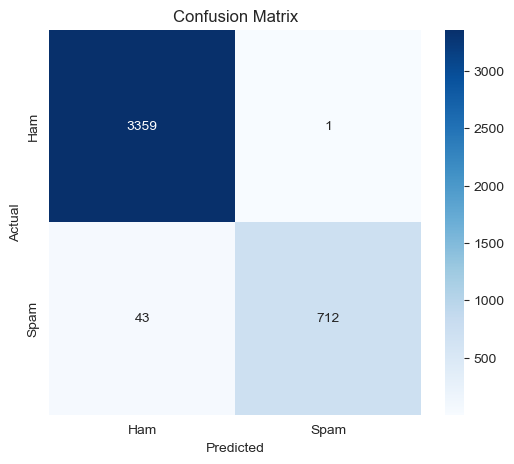

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)#Compute confusion matrix

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])#Plot confusion matrix
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [12]:
def classify_message(message):#function to classify a new message
    cleaned_message = clean(message)
    message_features = vectorizer.transform([cleaned_message])
    prediction = classifier.predict(message_features)#predict
    return "Spam" if prediction[0] == 1 else "Ham"

In [16]:
import sys
sys.path.insert(0, '/home/kanishk-jain/Desktop/SpamClassifier/')
import ttkbootstrap as ttk

In [17]:
import tkinter as tk
from tkinter import ttk,messagebox
from PIL import Image, ImageTk
import os
import ttkbootstrap as ttk
from ttkbootstrap.constants import *
from tkinter import messagebox

In [18]:
def classify_message(message):#dummy function — replace with your real classifier
    return "Spam" if "win" in message.lower() else "Not Spam"

def create_gui():
    window = ttk.Window(themename="cosmo")
    window.title("📩 SMS Spam Classifier")
    window.geometry("600x450")
    ttk.Label(window, text="📨 Enter an SMS message to classify", font=("Arial", 14, "bold")).pack(pady=15)
    text_entry = ttk.Text(window, height=6, width=60, wrap="word", font=("Arial", 11))
    text_entry.pack(pady=10, padx=20)

    result_label = ttk.Label(window, text="", font=("Arial", 12), bootstyle="info")
    result_label.pack(pady=10)

    def on_classify():
        message = text_entry.get("1.0", "end").strip()
        if message:
            result = classify_message(message)
            result_label.config(text=f"🧠 Prediction: {result}")
        else:
            messagebox.showwarning("Input Error", "Please enter a message!")

    def on_clear():
        text_entry.delete("1.0", "end")
        result_label.config(text="")

    button_frame = ttk.Frame(window)
    button_frame.pack(pady=10)

    ttk.Button(button_frame, text="Classify", command=on_classify, bootstyle="success-outline").pack(side="left", padx=10)
    ttk.Button(button_frame, text="Clear", command=on_clear, bootstyle="secondary-outline").pack(side="left", padx=10)

    ttk.Label(window, text="🔒 This tool predicts spam messages using ML", font=("Arial", 9), bootstyle="secondary").pack(pady=20)

    window.mainloop()


In [19]:
# Run the GUI
print("Launching GUI...")
create_gui()

Launching GUI...
